# Linear Regression with Gradient Descent in Tensorflow

In [30]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

In [31]:
#Impleting using class and objects
class GDLinearRegression:
    def __init__(self, initializer='random'):
        #Intializer for value depends upon the input
        if initializer=='ones':
            self.var = 1.
        elif initializer=='zero':
            self.var = 0.
        elif initializer=='random':
            #uniform distribution
            self.var = tf.random.uniform(shape=[], minval=0., maxval=1.)
        else:
            print('Not defined Initailizer. Allowed Intializers : "one","zero","random"')
            quit()
            
        self.m = tf.Variable(self.var, shape=tf.TensorShape(None))
        self.b = tf.Variable(self.var)
        
    def predict(self, X):
        return tf.reduce_sum(self.m * X, 1) + self.b
    #loss is mean_squared_error
    def mse(self, true, predicted):
        return tf.reduce_mean(tf.square(true-predicted))
    
    def update(self, X, y, lr):
        with tf.GradientTape(persistent=True) as g:
            loss = self.mse(y, self.predict(X))
            
        print("Loss: ", loss)
        #calculates the gradients for both m and b
        dy_dm = g.gradient(loss, self.m)
        dy_db = g.gradient(loss, self.b)
        #the gradient is multiplied with learning rate and the old value is subtarted from the new value (lr*gradient) 
        self.m.assign_sub(lr * dy_dm)
        self.b.assign_sub(lr * dy_db)
    
    def train(self, X, y, lr=0.01, epochs=5):
        #check if input data is 1D, if yes change it to 2D
        if len(X.shape)==1:
            X=tf.reshape(X,[X.shape[0],1])
        
        self.m.assign([self.var]*X.shape[-1])
        
        for i in range(epochs):
            print("Epoch: ", i)
            
            self.update(X, y, lr)

In [32]:
#splitting the data into train test splits
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [33]:
#Standard Scaling the data(can be done using sklearn.preprocessing.StandardScaler())
mean_label = y_train.mean(axis=0)
std_label = y_train.std(axis=0)
mean_feat = X_train.mean(axis=0)
std_feat = X_train.std(axis=0)
X_train_norm = (X_train-mean_feat)/std_feat
y_train_norm = (y_train-mean_label)/std_label

In [34]:
#creating an instance of the the class
model = GDLinearRegression('zero')
model.train(X_train_norm, y_train_norm, lr=0.1, epochs=50)

Epoch:  0
Loss:  tf.Tensor(1.0, shape=(), dtype=float32)
Epoch:  1
Loss:  tf.Tensor(0.52037114, shape=(), dtype=float32)
Epoch:  2
Loss:  tf.Tensor(0.42164913, shape=(), dtype=float32)
Epoch:  3
Loss:  tf.Tensor(0.37224513, shape=(), dtype=float32)
Epoch:  4
Loss:  tf.Tensor(0.34227636, shape=(), dtype=float32)
Epoch:  5
Loss:  tf.Tensor(0.32331648, shape=(), dtype=float32)
Epoch:  6
Loss:  tf.Tensor(0.31094158, shape=(), dtype=float32)
Epoch:  7
Loss:  tf.Tensor(0.3025783, shape=(), dtype=float32)
Epoch:  8
Loss:  tf.Tensor(0.29670173, shape=(), dtype=float32)
Epoch:  9
Loss:  tf.Tensor(0.29239812, shape=(), dtype=float32)
Epoch:  10
Loss:  tf.Tensor(0.28911322, shape=(), dtype=float32)
Epoch:  11
Loss:  tf.Tensor(0.2865066, shape=(), dtype=float32)
Epoch:  12
Loss:  tf.Tensor(0.28436556, shape=(), dtype=float32)
Epoch:  13
Loss:  tf.Tensor(0.2825551, shape=(), dtype=float32)
Epoch:  14
Loss:  tf.Tensor(0.28098774, shape=(), dtype=float32)
Epoch:  15
Loss:  tf.Tensor(0.27960542, shape

In [35]:
# standard scaling the test data
X_test_norm = (X_test-mean_feat)/std_feat
# reverse standardization the target
y_pred = model.predict(X_test_norm)
y_pred *= std_label
y_pred += mean_label

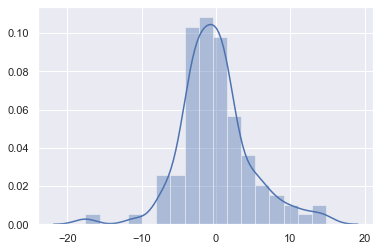

In [36]:
sns.distplot(y_test-y_pred)